In [ ]:
import math
import re
import string

import os

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import nltk
import pandas as pd
from langdetect import detect
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.models import Sequential

In [ ]:
#df1 = pd.read_csv("7282_1.csv", sep=',')
#df1.head(10)

In [ ]:
#df2 = pd.read_csv("Datafiniti_Hotel_Reviews.csv", sep=',')
#df2.head(10)

In [47]:
df = pd.read_csv("Datafiniti_Hotel_Reviews_Jun19.csv", sep=',')
df.head(10)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.441780,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
5,AVweLARAByjofQCxv5vX,2016-05-16T22:39:30Z,2019-05-20T23:28:44Z,167 W Main St,"Hotels,Hotels and motels,Hotel,Restaurants",Accommodation & Food Services,Lexington,US,us/ky/lexington/167wmainst/-1165617038,38.047014,...,2016-03-19T00:00:00Z,4,http://www.tripadvisor.com/Hotel_Review-g39588...,"This is such a fun, lovely hotel. The attentio...",Loved staying here,Nashville,TN,LKDiScenza,https://www.tripadvisor.com/Hotel_Review-g3958...,"http://www.firstnational.com/,https://www.21cm..."
6,AVweLARAByjofQCxv5vX,2016-05-16T22:39:30Z,2019-05-20T23:28:44Z,167 W Main St,"Hotels,Hotels and motels,Hotel,Restaurants",Accommodation & Food Services,Lexington,US,us/ky/lexington/167wmainst/-1165617038,38.047014,...,2016-05-10T00:00:00Z,1,https://www.tripadvisor.com/Hotel_Review-g3958...,We recently stayed at this hotel on a trip to ...,Does not live up to its reputation,Charlotte,NC,GGTravels2016,https://www.tripadvisor.com/Hotel_Review-g3958...,"http://www.firstnational.com/,https://www.21cm..."
7,AV1thAoL3-Khe5l_Ott5,2017-07-23T03:35:56Z,2019-05-20T23:28:32Z,115 W Steve Wariner Dr,"Hotels and motels,Hotel",Accommodation & Food Services,Russell Springs,US,us/ky/russellsprings/115wstevewarinerdr/-41169...,37.065296,...,"2017-12-17T00:00:00Z,2017-07-13T00:00:00Z",1,https://www.tripadvis

In [48]:
df = df[['reviews.rating', 'reviews.text', 'reviews.title']]
df['reviews.text'] = df['reviews.title'] + " " + df['reviews.text']
df.shape

(10000, 3)

In [49]:
df = df.drop_duplicates()
df = df.dropna()
df.shape

(9786, 3)

In [50]:
import matplotlib.pyplot as plt

def detect_lang(text):
    try:
        return detect(text)
    except:
        return "error"


df['lang'] = df['reviews.text'].apply(lambda x: detect_lang(x))

In [51]:
df = df.loc[df['lang'] == 'en']
df['lang'].value_counts()

lang
en    9770
Name: count, dtype: int64

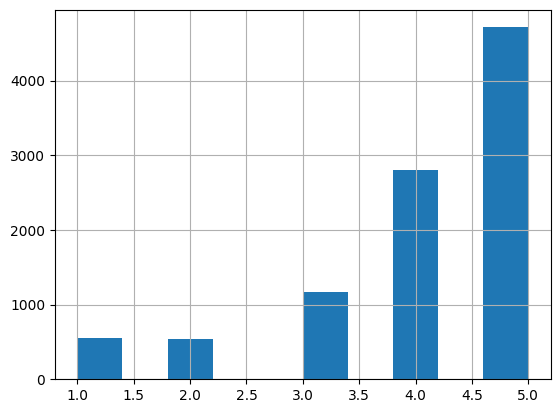

In [52]:
#afficher une courbe de distribution des notes
df['reviews.rating'].hist()
plt.show()

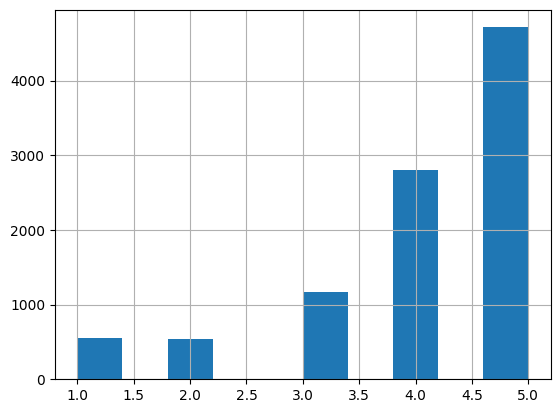

In [53]:
df['reviews.rating'] = df['reviews.rating'].apply(lambda x: x - 5 if x > 5 else x)
df['reviews.rating'] = df['reviews.rating'].apply(lambda x: math.floor(x))
df['reviews.rating'].hist()
plt.show()

In [54]:
df['reviews.rating'].value_counts()

reviews.rating
5    4714
4    2800
3    1166
1     555
2     535
Name: count, dtype: int64

In [55]:
df.sort_values(by='reviews.rating', ascending=False)

,reviews.rating,reviews.text,reviews.title,lang
8954,5,"Love this place We love this place, and we wil...",Love this place,en
8712,5,"My Alone Time With Hubby It was a great room, ...",My Alone Time With Hubby,en
4716,5,Clean and quiet Right off the highway this lit...,Clean and quiet,en
4713,5,So much better than the stril I come to Vegas ...,So much better than the stril,en
8709,5,Locale and Price is worth it. It is worth the ...,Locale and Price is worth it.,en
...,...,...,...,...
5330,1,"Horrible breakfast, horrible customer service ...","Horrible breakfast, horrible customer service",en
1803,1,Black Mold in bathroom For a place just to sle...,Black Mold in bathroom,en
3293,1,Awful! We were price gouged on a Saturday nigh...,Awful!,en
4756,1,Bad Just not satisfied with the outdated room ...,Bad,en


In [56]:
nltk.download('stopwords')
en_stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()


def clean_text(text):
    result = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', result)
    text = [ps.stem(word) for word in tokens if word not in en_stopwords]
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/timothee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
vectorisation_full = TfidfVectorizer(analyzer=clean_text)
#vect final with title and text
X = vectorisation_full.fit_transform(df['reviews.text'])

In [58]:
df['reviews.rating'].apply(lambda x: math.floor(x))

0       3
1       4
2       3
3       5
4       2
       ..
9995    4
9996    5
9997    5
9998    5
9999    4
Name: reviews.rating, Length: 9770, dtype: int64

In [59]:
vectorisation_df = pd.DataFrame(X.toarray())
vectorisation_df

,0,1,2,3,4,5,6,7,8,9,...,25983,25984,25985,25986,25987,25988,25989,25990,25991,25992
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
vocab_size = vectorisation_df.shape[0]
vocab_size

9770

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=16)) 
model.add(LSTM(16))  
model.add(Dense(6, activation='softmax')) 


# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class classification

In [68]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(vectorisation_df, df['reviews.rating'], test_size=0.2, random_state=42)

In [69]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
 78/123 [==================>...........] - ETA: 12:43 - loss: 0.6653 - accuracy: 0.3988

In [ ]:
from matplotlib import pyplot as plt

# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score} / Test accuracy: {score}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()